In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
'''
ECE276A WI22 PR1: Color Classification and Recycling Bin Detection
'''


from __future__ import division

from generate_rgb_data import read_pixels
from pixel_classifier import PixelClassifier


# test the classifier

folder = 'data/validation/blue'

X = read_pixels(folder)
myPixelClassifier = PixelClassifier()
y = myPixelClassifier.classify(X)

print('Precision: %f' % (sum(y==3)/y.shape[0]))

Precision: 0.951807


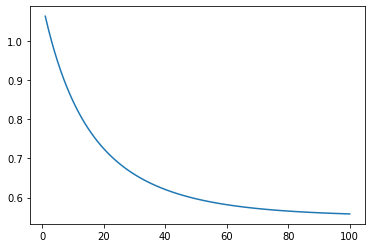

In [8]:
# Plot training procedure.
import matplotlib.pyplot as plt
plt.plot(
    myPixelClassifier.loss_steps["step"],
    myPixelClassifier.loss_steps["loss"],
)

In [9]:
# Show classification report.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

val_preds = myPixelClassifier.classify(myPixelClassifier.val_samples)
target_names = ["red", "green", "blue"]
print(classification_report(myPixelClassifier.val_labels, val_preds, target_names=target_names))

              precision    recall  f1-score   support

         red       0.94      1.00      0.97        82
       green       1.00      0.99      0.99        68
        blue       1.00      0.95      0.98        83

    accuracy                           0.98       233
   macro avg       0.98      0.98      0.98       233
weighted avg       0.98      0.98      0.98       233



In [10]:
# Show confusion matrix.
from sklearn.metrics import confusion_matrix

print(confusion_matrix(myPixelClassifier.val_labels, val_preds))

[[82  0  0]
 [ 1 67  0]
 [ 4  0 79]]
